<a href="https://colab.research.google.com/github/MariaAsif123/Data-Science-and-Analytics-Internship-Tasks/blob/main/Task02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 2: Credit Risk Prediction**

1. Introduction & Problem Statement

In [1]:
# Objective: Predict whether a loan applicant will be approved (1) or not (0)
# based on applicant's details using a classification model.

2. Dataset Understanding

In [2]:
# Dataset: Loan Prediction Dataset (Kaggle)
# Features: Loan amount, applicant income, education, credit history, etc.
# Target: Loan_Status (Y = Approved, N = Not Approved)

3. Import Libraries


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

4. Load Dataset


In [4]:
df = pd.read_csv("/content/Loan.csv")

5. Data Cleaning & Preparation

In [5]:
# Fill missing numeric values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill missing categorical values with mode
df.fillna(df.mode().iloc[0], inplace=True)

print("Missing values after filling:\n", df.isnull().sum())

Missing values after filling:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


6. Exploratory Data Analysis (EDA)

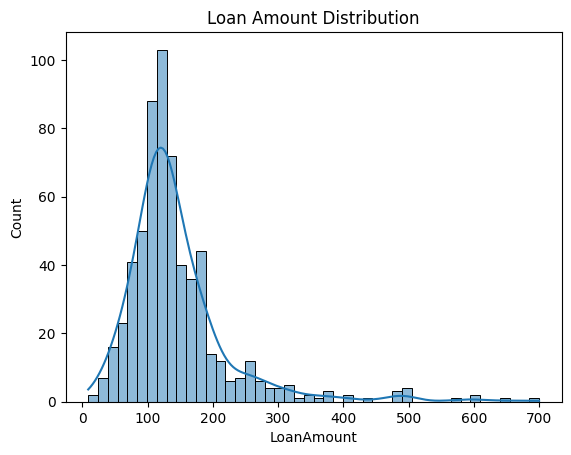

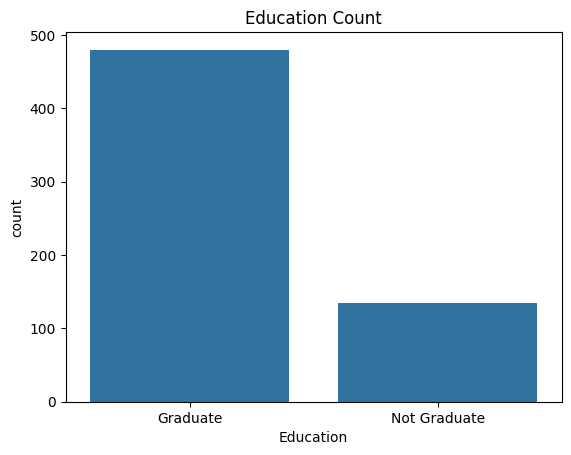

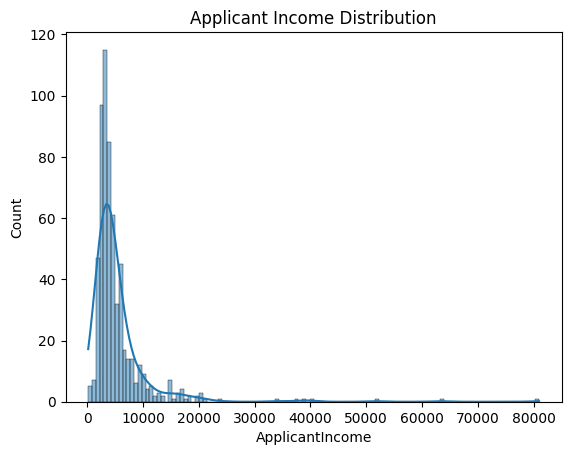

In [6]:
# Loan Amount distribution
sns.histplot(df['LoanAmount'], kde=True)
plt.title("Loan Amount Distribution")
plt.show()

# Education count
sns.countplot(x='Education', data=df)
plt.title("Education Count")
plt.show()

# Applicant Income distribution
sns.histplot(df['ApplicantIncome'], kde=True)
plt.title("Applicant Income Distribution")
plt.show()

7. Model Training & Testing

In [7]:
# Convert target variable to binary
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# Convert categorical features to dummy variables
X = pd.get_dummies(df.drop('Loan_Status', axis=1), drop_first=True)
y = df['Loan_Status']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


8. Evaluation Metrics

In [8]:
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)

Accuracy: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]


9. Conclusion

In [9]:
# The model achieved an accuracy score which indicates its performance
# Confusion matrix shows correct vs incorrect predictions
# Further tuning or trying other models (e.g., Decision Tree, Random Forest)
# can improve results.